# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | al jubayl
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | acarau
Processing Record 6 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 7 of Set 1 | horta
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | brookings
Processing Record 11 of Set 1 | babat
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | muisne
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | vilhena
Processing Record 18 of Set 1 | ghanzi
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | brisas de zicatela
Processing Record 21 of Set 1 | manado
Processing Recor

Processing Record 39 of Set 4 | galle
Processing Record 40 of Set 4 | harnosand
Processing Record 41 of Set 4 | ain taya
Processing Record 42 of Set 4 | hadibu
Processing Record 43 of Set 4 | isangel
Processing Record 44 of Set 4 | popondetta
Processing Record 45 of Set 4 | sarmiento
Processing Record 46 of Set 4 | kodiak
Processing Record 47 of Set 4 | manta
Processing Record 48 of Set 4 | cole harbour
Processing Record 49 of Set 4 | iskateley
Processing Record 0 of Set 5 | panchgani
Processing Record 1 of Set 5 | dera bugti
Processing Record 2 of Set 5 | san antonio
Processing Record 3 of Set 5 | side
Processing Record 4 of Set 5 | wang nam yen
Processing Record 5 of Set 5 | mebane
Processing Record 6 of Set 5 | sturgeon bay
Processing Record 7 of Set 5 | newman
Processing Record 8 of Set 5 | sedan
Processing Record 9 of Set 5 | san ciro de acosta
Processing Record 10 of Set 5 | xilin hot
Processing Record 11 of Set 5 | west island
Processing Record 12 of Set 5 | letlhakane
Processin

Processing Record 32 of Set 8 | marsh harbour
Processing Record 33 of Set 8 | naze
Processing Record 34 of Set 8 | kudahuvadhoo
Processing Record 35 of Set 8 | essaouira
Processing Record 36 of Set 8 | launceston
Processing Record 37 of Set 8 | sant antoni de portmany
Processing Record 38 of Set 8 | nishon tumani
Processing Record 39 of Set 8 | vernon
Processing Record 40 of Set 8 | marsabit
Processing Record 41 of Set 8 | gadzhiyevo
Processing Record 42 of Set 8 | kiunga
Processing Record 43 of Set 8 | west end
Processing Record 44 of Set 8 | yamba
Processing Record 45 of Set 8 | mytilene
Processing Record 46 of Set 8 | paris
Processing Record 47 of Set 8 | mil'kovo
Processing Record 48 of Set 8 | margate
Processing Record 49 of Set 8 | taitung city
Processing Record 0 of Set 9 | bayanhongor
Processing Record 1 of Set 9 | salinas
Processing Record 2 of Set 9 | ogulin
Processing Record 3 of Set 9 | humaita
Processing Record 4 of Set 9 | fedorovskiy
Processing Record 5 of Set 9 | fale o

Processing Record 25 of Set 12 | suva
Processing Record 26 of Set 12 | novyy chirkey
Processing Record 27 of Set 12 | terralba
Processing Record 28 of Set 12 | ulladulla
Processing Record 29 of Set 12 | mbanza-ngungu
Processing Record 30 of Set 12 | bonthe
Processing Record 31 of Set 12 | beohari
Processing Record 32 of Set 12 | dunedin
Processing Record 33 of Set 12 | del rio
Processing Record 34 of Set 12 | rancharia
Processing Record 35 of Set 12 | luganville
Processing Record 36 of Set 12 | barpathar
Processing Record 37 of Set 12 | qutqashen
Processing Record 38 of Set 12 | callao
Processing Record 39 of Set 12 | kalashnikovo
Processing Record 40 of Set 12 | novo aripuana
Processing Record 41 of Set 12 | cable beach
City not found. Skipping...
Processing Record 42 of Set 12 | bomdila
Processing Record 43 of Set 12 | aur
Processing Record 44 of Set 12 | barrie
Processing Record 45 of Set 12 | nagqu
Processing Record 46 of Set 12 | ouellah
City not found. Skipping...
Processing Reco

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,1.48,98,100,5.33,GS,1698358371
1,al jubayl,27.0112,49.6583,27.07,57,0,6.10,SA,1698358361
2,thompson,55.7435,-97.8558,-1.91,50,100,4.12,CA,1698358371
3,blackmans bay,-43.0167,147.3167,10.41,68,51,1.01,AU,1698358371
4,acarau,-2.8856,-40.1200,25.87,77,7,7.27,BR,1698358155


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,1.48,98,100,5.33,GS,1698358371
1,al jubayl,27.0112,49.6583,27.07,57,0,6.10,SA,1698358361
2,thompson,55.7435,-97.8558,-1.91,50,100,4.12,CA,1698358371
3,blackmans bay,-43.0167,147.3167,10.41,68,51,1.01,AU,1698358371
4,acarau,-2.8856,-40.1200,25.87,77,7,7.27,BR,1698358155


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

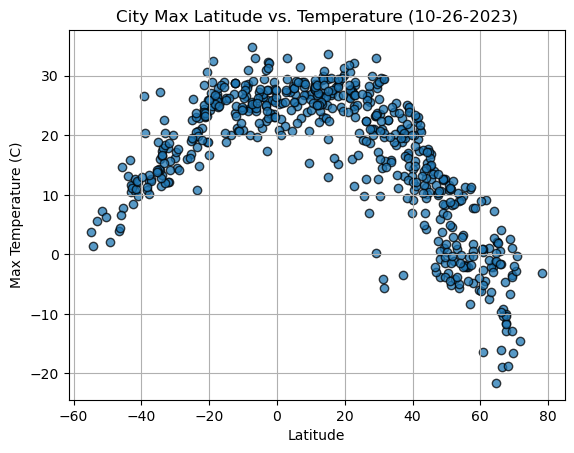

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

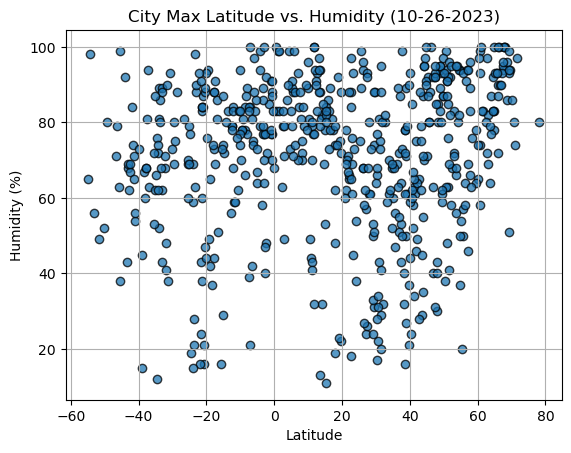

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

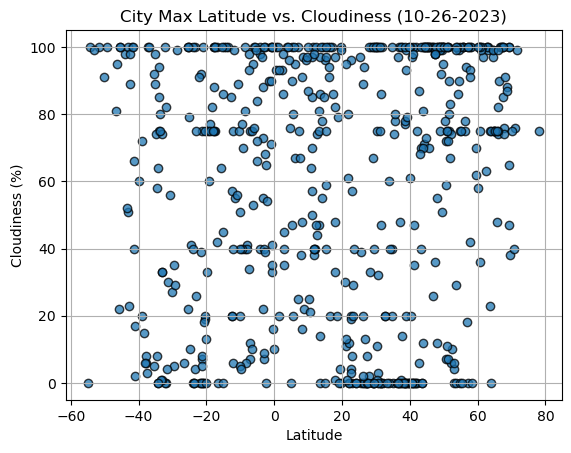

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

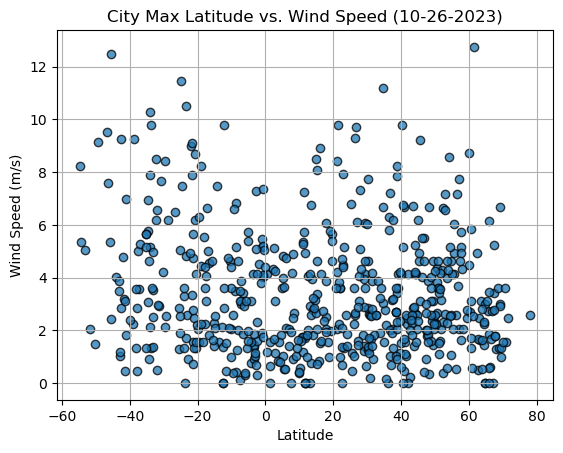

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.title(f"City Max Latitude vs. Wind Speed ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,al jubayl,27.0112,49.6583,27.07,57,0,6.10,SA,1698358361
2,thompson,55.7435,-97.8558,-1.91,50,100,4.12,CA,1698358371
5,horta,38.5333,-28.6333,16.68,78,77,2.68,PT,1698358372
7,brookings,44.3114,-96.7984,10.10,95,100,4.12,US,1698358372
9,iqaluit,63.7506,-68.5145,-2.15,64,75,3.09,CA,1698358372


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,1.48,98,100,5.33,GS,1698358371
3,blackmans bay,-43.0167,147.3167,10.41,68,51,1.01,AU,1698358371
4,acarau,-2.8856,-40.1200,25.87,77,7,7.27,BR,1698358155
6,margaret river,-33.9500,115.0667,13.31,52,85,5.14,AU,1698358372
8,babat,-7.1128,112.1635,24.64,84,7,2.98,ID,1698358372


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7224937843805831


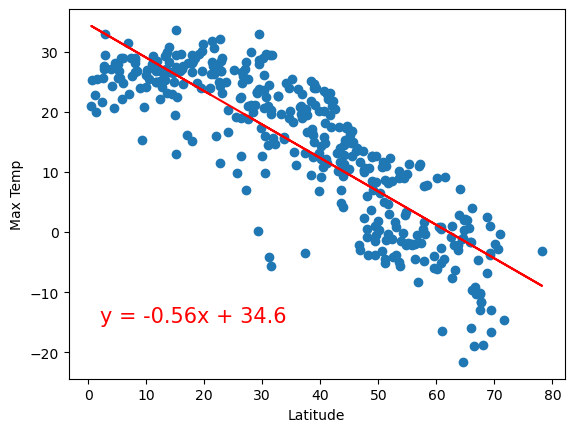

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,-15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6877118104337364


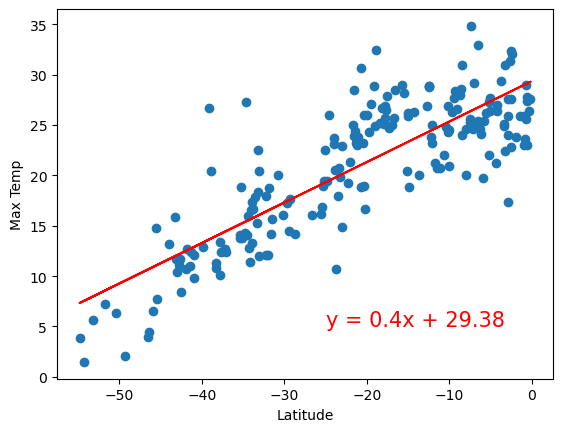

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The max temperature increases as the latitude gets closer to 0, so the more negative or positive the latitude the colder the max temperature is and the closer the latitude is to 0 (the equator) the hotter the max temperature for both the northern and southern hemisphere. In conclusion the northern hemisphere has a negative correlation and the southern hemisphere has a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.013450857246340354


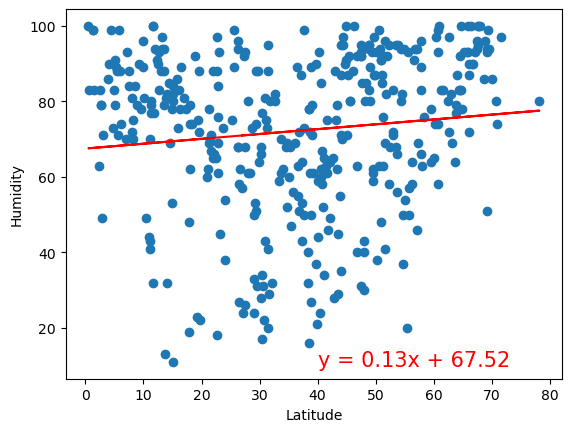

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0315837160452603


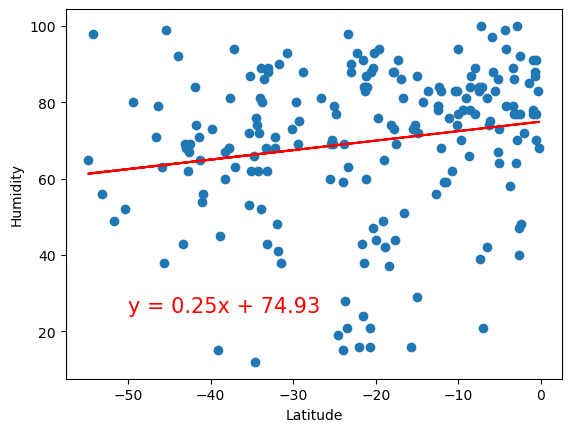

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere there is a slightly positive correlation but when observing the scatter plot there does not seem to be a strong correlation between humidity and latitude. The humidity seems to be higher for majority of the latitude in the northern hemisphere. In the southern hemisphere there is also a slightly positive correlation and when observing you can see that when closer to the equator there are more places with higher humidity leading to a slighty positive correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.026829361991143653


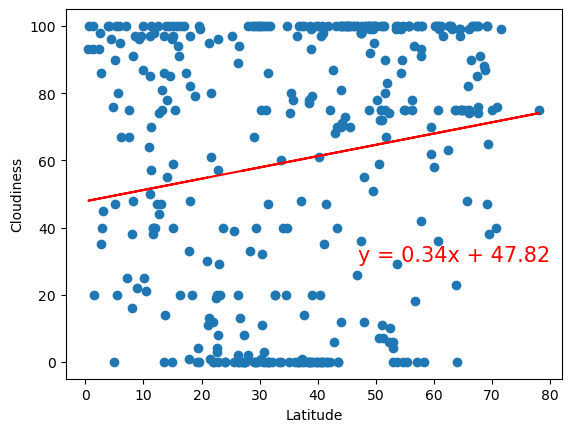

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(47,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00017614197654068235


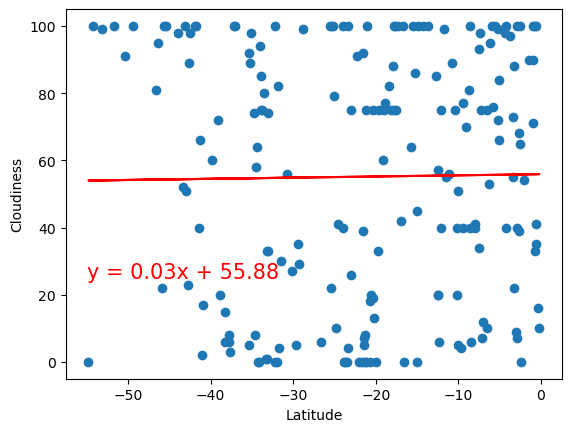

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere there is a slightly positive correlation between cloudiness and latitude. Through observation it is seen that there are less places with lower cloudiness as latitude increases. Overall there seems to be no strong correlation because cloudiness is scattered along the same latitude. In the southern hemisphere there is no correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.001424213541384955


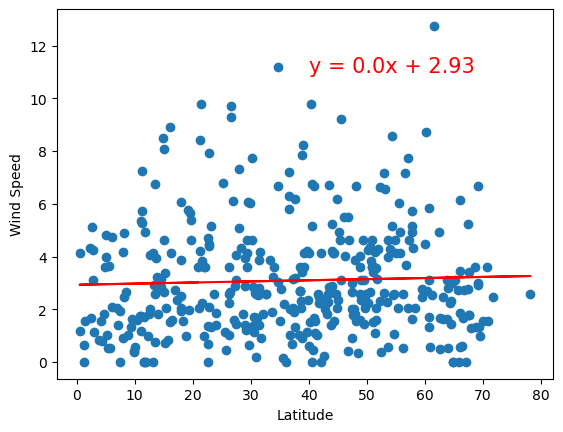

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.06388449941525327


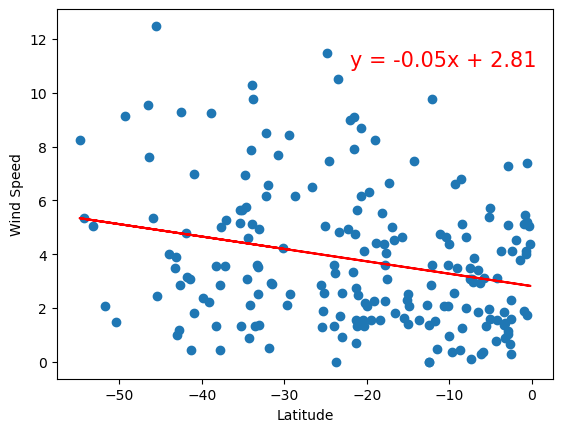

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere there is no correlation between wind speed and latitude. In the southern hemisphere there is a slightly negative correlation between wind speed and latitude. Through observation it seems that the further from the equator the more windy overall and the closer to the equator the less windy overall leading to a slighty negative correlation.